<a href="https://colab.research.google.com/github/Abdulmajeed1234/Customer-Churn-Analysis-Prediction/blob/main/Customer_Churn_Analysis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer Churn**

It is when an existing customer, user, subscriber, or any kind of return client stops doing business or ends the relationship with a company.

**Types of Customer Churn** –

**Contractual Churn** : When a customer is under a contract for a service and decides to cancel the service e.g. Cable TV, SaaS.

**Voluntary Churn** : When a user voluntarily cancels a service e.g. Cellular connection.

**Non-Contractual Churn** : When a customer is not under a contract for a service and decides to cancel the service e.g. Consumer Loyalty in retail stores.

**Involuntary Churn** : When a churn occurs without any request of the customer e.g. Credit card expiration.

**Reasons for Voluntary Churn**

Lack of usage

Poor service

Better price

**Importing Churn dataset**

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd

# Import the dataset
dataset = pd.read_csv('/content/Customer_Churn_Dataset.csv')

# Glance at the first five records
dataset.head()

# Print all the features of the data
dataset.columns


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

**Exploratory Data Analysis on Churn Dataset**

**Code** : To find the number of churners and non-churners in the dataset:

In [ ]:
# Churners vs Non-Churners
dataset['Churn'].value_counts()


,count
Churn,
0,89
1,11


**Code**: To group data by Churn and compute the mean to find out if churners make more customer service calls than non-churners:

In [ ]:
# Group data by 'Churn' and compute the mean
print(dataset.groupby('Churn')['Customer service calls'].mean())



Churn
0    4.269663
1    3.454545
Name: Customer service calls, dtype: float64


Yes! Perhaps unsurprisingly, churners seem to make more customer service calls than non-churners.

**Code**: To find out if one State has more churners compared to another.

In [ ]:
# Count the number of churners and non-churners by State
print(dataset.groupby('State')['Churn'].value_counts())


State  Churn
CA     0         7
FL     0         8
       1         1
GA     0         8
       1         4
IL     0        10
MI     0        14
       1         1
NC     0        11
NY     0        10
OH     0        10
       1         1
PA     0         4
       1         2
TX     0         7
       1         2
Name: count, dtype: int64



In our dataset, we observe that while California (CA) is the most populous state in the U.S., it has a relatively lower representation of customers. However, California exhibits a higher number and percentage of churners compared to other states




***Exploring Data Visualizations ***: To understand how variables are distributed.

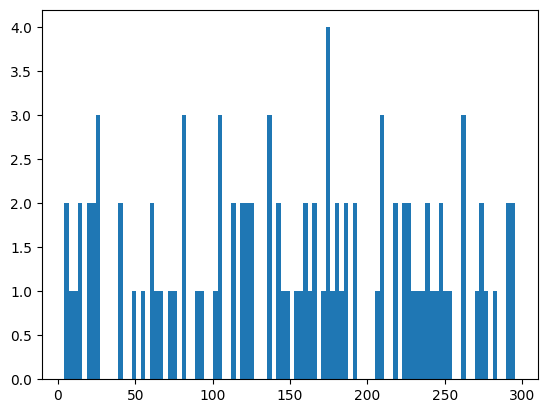

In [ ]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of 'Total day minutes'
plt.hist(dataset['Total day minutes'], bins = 100)

# Display the plot
plt.show()


**Code**: To visualize the difference in Customer service calls between churners and non-churners

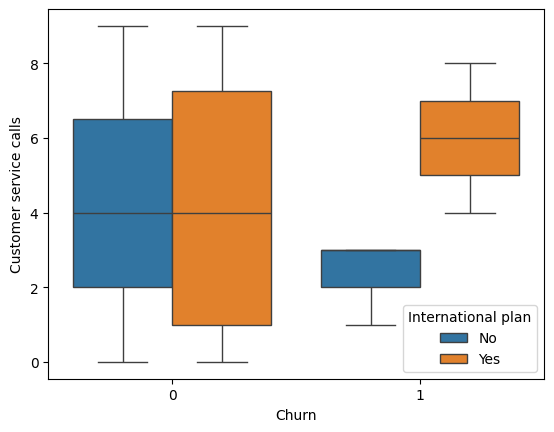

In [14]:
# Create the box plot
sns.boxplot(x='Churn',
            y='Customer service calls',
            data=dataset,
            flierprops={'marker': '', 'markerfacecolor': 'none'},  # Hide outliers
            hue="International plan")
# Display the plot
plt.show()


It looks like customers who do churn end up leaving more customer service calls unless these customers also have an international plan, in which case they leave fewer customer service calls. This type of information is really useful in better understanding the drivers of churn. It’s now time to learn about how to preprocess your data prior to modelling.

**Data Preprocessing for Telco Churn Dataset**

Many Machine Learning models make certain assumptions about how the data is distributed. Some of the assumptions are as follows:

The features are normally distributed
The features are on the same scale
The datatypes of features are numeric
In telco churn data, Churn, Voice mail plan, and, International plan, in particular, are binary features that can easily be converted into 0’s and 1’s.

In [15]:
# Features and Labels
X = dataset.iloc[:, 0:19].values
y = dataset.iloc[:, 19].values # Churn

# Encoding categorical data in X
from sklearn.preprocessing import LabelEncoder

labelencoder_X_1 = LabelEncoder()
X[:, 3] = labelencoder_X_1.fit_transform(X[:, 3])

labelencoder_X_2 = LabelEncoder()
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4])

# Encoding categorical data in y
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)


**Code**: Encoding State feature using One hot encoding

In [16]:
# Removing extra column to avoid dummy variable trap
X_State = pd.get_dummies(X[:, 0], drop_first = True)

# Converting X to a dataframe
X = pd.DataFrame(X)

# Dropping the 'State' column
X = X.drop([0], axis = 1)

# Merging two dataframes
frames = [X_State, X]
result = pd.concat(frames, axis = 1, ignore_index = True)

# Final dataset with all numeric features
X = result


**Code** : To Create Training and Test sets

In [17]:
# Splitting the dataset into the Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
													test_size = 0.2,
													random_state = 0)


**Code**: To scale features of the training and test sets


In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


**Code**: To train a Random Forest classifier model on the training set.

In [19]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train, y_train)


RandomForestClassifier()

**Code**: Making Predictions.

In [20]:
# Predict the labels for the test set
y_pred = clf.predict(X_test)


**Code**: Evaluating Model Performance

In [21]:
# Compute accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


1.0

**Code** : Confusion Matrix

True Positives(TP) = 0
True Negatives(TN) = 20
False Positives(FP) = 0
False Negatives(FN) = 0
Precision = TP/(TP+FP) = nan
Recall = TP/(TP+FN) = nan
Accuracy = (TP+TN)/(TP+TN+FP+FN) = 1.0000


<ipython-input-30-cd1c20468320>:13: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)
<ipython-input-30-cd1c20468320>:14: RuntimeWarning: invalid value encountered in scalar divide
  recall = tp / (tp + fn)


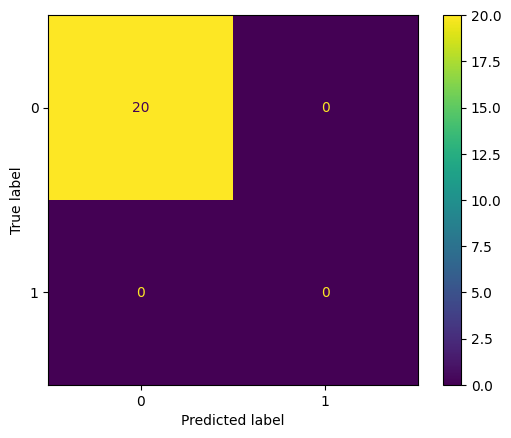

In [30]:
# Import the necessary modules
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ... (rest of your code) ...

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Get the individual values
tn, fp, fn, tp = cm.ravel()

# Calculate metrics
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Print the values
print(f"True Positives(TP) = {tp}")
print(f"True Negatives(TN) = {tn}")
print(f"False Positives(FP) = {fp}")
print(f"False Negatives(FN) = {fn}")
print(f"Precision = TP/(TP+FP) = {precision:.2f}")
print(f"Recall = TP/(TP+FN) = {recall:.2f}")
print(f"Accuracy = (TP+TN)/(TP+TN+FP+FN) = {accuracy:.4f}")

# Create the ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Plot the confusion matrix
disp.plot()


True Positives(TP) = 0

True Negatives(TN) = 20

False Positives(FP) = 0

False Negatives(FN) = 0

Precision = TP/(TP+FP) = nan

Recall = TP/(TP+FN) = nan

Accuracy = (TP+TN)/(TP+TN+FP+FN) = 1.0000